In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import cv2
from os import listdir
from scipy import misc
import json

dict_keys(['every_2', 'release', 'every_5', 'position', '3_refined', 'every_4', 'label', '3_refined_nograd', 'every_3'])
['k=2', 'k=5', 'k=4', 'Statcast', 'k=3 refined', 'k=3']
('Statcast', 'k=2', 'k=3', 'k=3 refined', 'k=4', 'k=5') (3, 0, 5, 4, 2, 1)


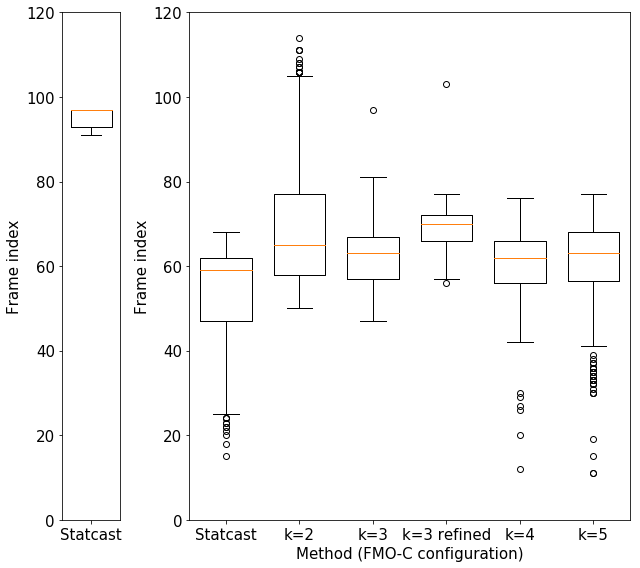

In [100]:
import pandas as pd
# path = "all_first_move_tests.json"
path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/3_Event_detection/all_first_move_tests.json"
with open(path, "r") as infile:
    dic = json.load(infile)
print(dic.keys())

plt.figure(figsize=(9,8))
# gs = gridspec_kw = {'width_ratios':[1, 5]}
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 5)
plt.subplot(gs[0,0])
plt.boxplot(dic["release"], positions= [0], widths=(0.7))
plt.xticks([0], ["Statcast"], fontsize=15)
plt.yticks(fontsize=15)
    # plt.title(lab)
plt.ylabel("Frame index", fontsize=15)
# plt.title("Release frame", fontsize=15)
plt.ylim(0,120)
    # i+=1
# plt.show()
plt.subplot(gs[0,1:])
i=0
liste=[]
l2=[]
for key in dic.keys():
    if "every" in key:
        lab = "k="+key[-1]
    elif key=="label":
        lab = "Statcast"
    elif key=="release":
        continue
        lab = "release frame"
    elif key=="3_refined_nograd":
        lab = "k=3 refined"
    else:
        continue
    # plt.subplot(1, len(dic.keys())-1,i+1)
    l2.append(lab)
    liste.append(dic[key])
print(l2)
from operator import itemgetter
inds, l2 = zip(*sorted(enumerate(l2), key=itemgetter(1)))
# print(list(L_sorted)
# inds = np.argsort(l2)
print(l2, inds)
new_list = []
for i in inds:
    new_list.append(liste[i])
#liste = np.array(liste)[inds]
liste = new_list
# l2=l2[inds]
plt.boxplot(liste, positions=np.arange(len(liste)), widths=tuple([0.7 for _ in range(len(liste))]))
plt.xticks(range(0, len(l2), 1), l2, fontsize=15)
plt.yticks(fontsize=15)
    # plt.title(lab)
plt.ylabel("Frame index", fontsize=15)
plt.ylim(0,120)
# plt.title("Pitcher's first movement", fontsize=15)
    # i+=1
plt.xlabel("Method (FMO-C configuration)", fontsize=15)
plt.tight_layout()
plt.savefig("/Users/ninawiedemann/Desktop/BA/boxplots")
plt.show()

In [21]:
path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/outputs/ten_fold.json"
with open(path, "r") as infile:
    dic = json.load(infile)
#dic["1_8_windup"] = dic.pop("1_8_both")
for k in dic.keys():
    print(k, "max", np.mean(dic[k]["maximum"]), "balanced:", np.mean(dic[k]["balanced_max"]), "mean", np.mean(dic[k]["mean_over5"]))
    
#with open(path, "w") as outfile:
#    json.dump(dic, outfile)

play_outcome max 0.979 balanced: 0.947 mean 0.968
5_3_windup max 0.813 balanced: 0.749 mean 0.7682
5_3_stretch max 0.809 balanced: 0.788 mean 0.7582
1_3_stretch max 0.723 balanced: 0.637 mean 0.6856
1_8_stretch max 0.556 balanced: 0.608 mean 0.5078
1_3_windup max 0.736 balanced: 0.633 mean 0.6862
5_8_windup max 0.711 balanced: 0.689 mean 0.6432
5_8_both max 0.651 balanced: 0.608 mean 0.597
1_3_both max 0.721 balanced: 0.634 mean 0.6936
5_8_stretch max 0.612 balanced: 0.651 mean 0.5338
1_8_windup max 0.555 balanced: 0.601 mean 0.5256
position max 0.971 balanced: 0.97 mean 0.9588
1_8_both max 0.558 balanced: 0.598 mean 0.5246
5_3_both max 0.802 balanced: 0.737 mean 0.7758


['frame 11.0', 'frame 12.0', 'frame 13.0', 'frame 14.0', 'frame 15.0', 'frame 16.0', 'frame 17.0', 'frame 18.0', 'frame 19.0', 'frame 20.0', 'frame 21.0', 'frame 22.0', 'frame 23.0', 'frame 24.0', 'frame 25.0']
192153.json
{'link': 'http://ze-video.mlb.com/video/mlbam/2016/10/01/umpeval/video/449253/160930_192153', 'camera_c': {}, 'camera_b': {}, 'camera_a': {'frame 13.0': {'x': 248.0, 'y': 224.5}, 'frame 18.0': {'x': 477.0, 'y': 294.5}, 'frame 12.0': {'x': 205.0, 'y': 211.5}, 'frame 16.0': {'x': 384.0, 'y': 267.5}, 'frame 21.0': {'x': 620.0, 'y': 342.0}, 'frame 11.0': {'x': 160.0, 'y': 198.5}, 'frame 15.0': {'x': 338.0, 'y': 252.0}, 'frame 19.0': {'x': 524.5, 'y': 310.0}, 'frame 14.0': {'x': 293.5, 'y': 238.0}, 'frame 20.0': {'x': 572.0, 'y': 327.0}, 'frame 22.0': {'x': 669.0, 'y': 364.0}, 'frame 17.0': {'x': 428.5, 'y': 280.5}}}
no camera a
336


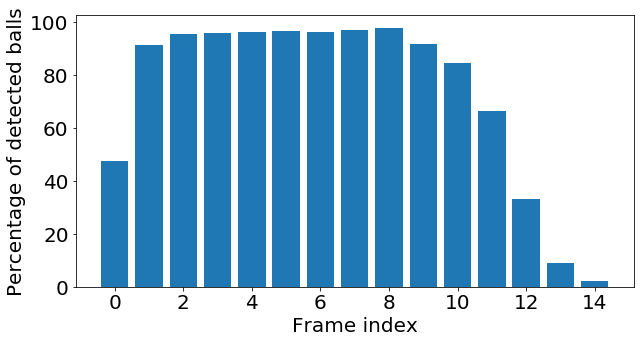

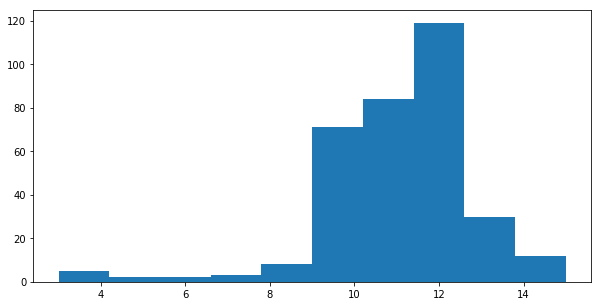

In [3]:
path = "/Users/ninawiedemann/Desktop/PITCHfx video/"
list_of_frames = []
res = np.zeros(15)
for i in range(15):
    list_of_frames.append("frame "+str(i+11)+".0")
print(list_of_frames)
counter = 0
number_detections = []
files = listdir(path)
for fi in files:
    if fi[-4:]=="json":
        with open(path+fi, "r") as infile:
            dic = json.load(infile)
        if dic["camera_a"]=={} or dic["camera_b"]=={} or dic["camera_c"]=={}:
            print(fi)
            print(dic)
            print("no camera a")
            continue
        counter+=1
        number_detections.append(len(dic["camera_a"].keys()))
        for i, frame in enumerate(list_of_frames):
            if frame in dic["camera_a"].keys():
                res[i]+=1
print(counter)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(res)), np.array(res)/337*100)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Percentage of detected balls", fontsize = 20)
plt.xlabel("Frame index", fontsize = 20)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(number_detections)
plt.show()

In [ ]:
        if t==175:
            plt.figure(figsize=(15,5))
            plt.subplot(1,3,1)
            plt.imshow(im_tm1)
            plt.axis("off")
            plt.title("Frame 174")
            plt.subplot(1,3,2)
            plt.imshow(im_t)
            plt.axis("off")
            plt.title("Frame 175")
            plt.subplot(1,3,3)
            plt.imshow(im_tp1)
            plt.axis("off")
            plt.title("Frame 176")
            plt.savefig("/Users/ninawiedemann/Desktop/BA/fmo detection/input", pad_inches=0)
            plt.show()
            print("nd")
            plt.imshow(nd)
            plt.savefig("/Users/ninawiedemann/Desktop/BA/fmo detection/thresholded_difference", pad_inches=0)
            plt.show()
            print("final frame")
            plt.imshow(final_frame)
            plt.savefig("/Users/ninawiedemann/Desktop/BA/fmo detection/shakiness_removed", pad_inches=0)
            plt.show()
            
            plot(im_t, candidates, t)
            break
        
\begin{figure}
    \centering
    \begin{subfigure}{0.5\textwidth}
        \includegraphics[width=\textwidth]{trajectories.png}
        \caption{\label{fig:trajectories_a}}
    \end{subfigure}
    \begin{subfigure}{0.5\textwidth}
        \includegraphics[width=\textwidth]{trajectories_interpolated.png}
        \caption{\label{fig:trajectories_b}}
    \end{subfigure}
    \begin{subfigure}{0.5\textwidth}
        \includegraphics[width=\textwidth]{trajectories_smoothed.png}
        \caption{\label{fig:trajectories_c}}
    \end{subfigure}
    \caption{Data processing: The original pose estimation output is noisy and contains many missing values, marked as zeros (\subref{fig:localize_a}). We interpolate missing values (\subref{fig:localize_b}) and use a lowpass filtering to yield a smooth output as shown in (\subref{fig:localize_c})}
    \label{fig:localization_problems}
\end{figure}

In [25]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

plt.plot(tip[:,0], tip[:,1], tip[:,2], linewidth=3)
plt.ylim(650,300)
#plt.yticks( fontsize=15)
#plt.xticks(fontsize=15)
#for i in range(5,len(tip)-5):
 #   print(int(tip[i][2]))
#  plt.annotate(int(tip[i][2]), (tip[:,0][i], tip[:,1][i]), label="frame nr")
plt.xlabel("X pixel coordinate", fontsize=15, labelpad=20)
plt.ylabel("Y pixel coordinate", fontsize=15, labelpad=20)
ax.set_zlabel('Frame', fontsize=15, labelpad=10)
plt.show()

NameError: name 'tip' is not defined

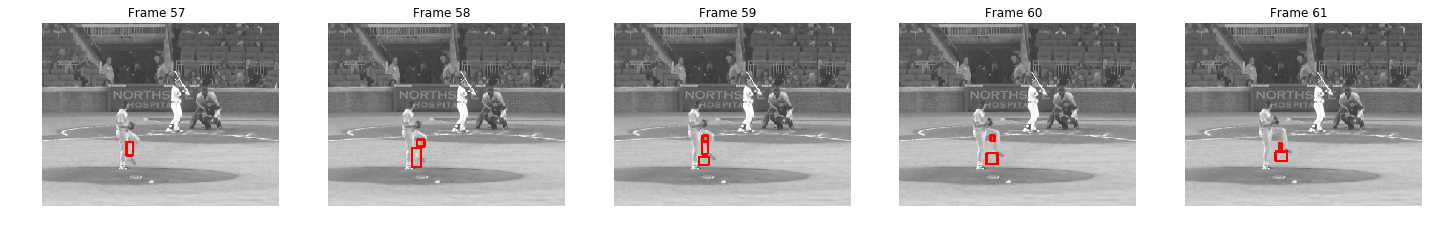

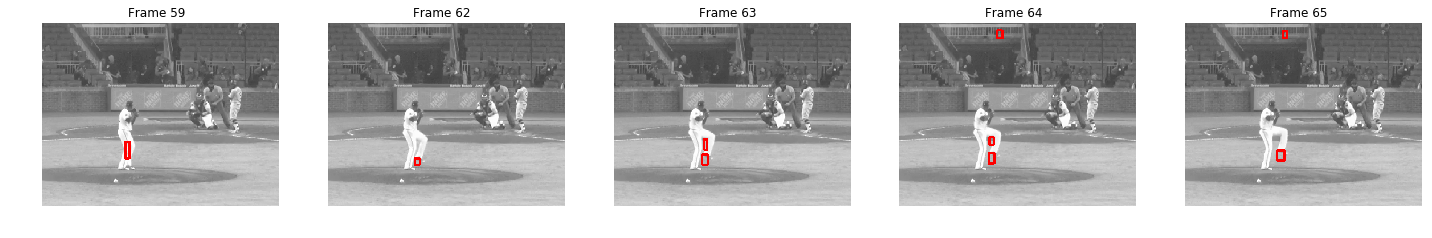

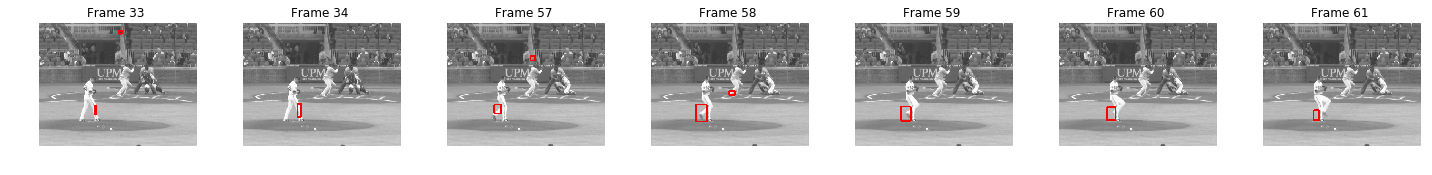

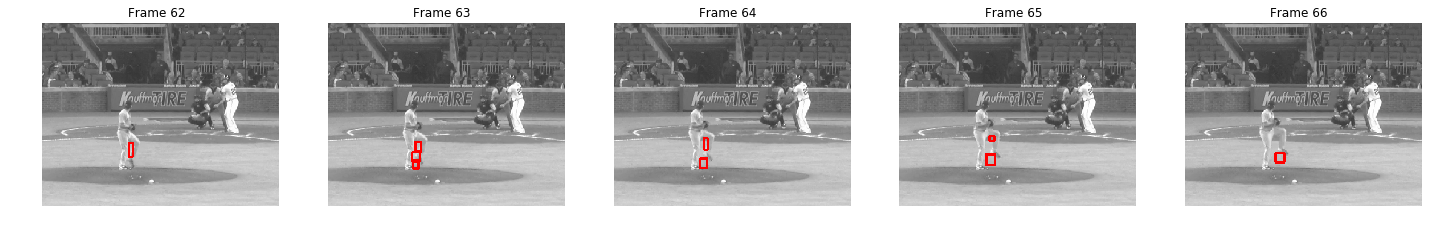

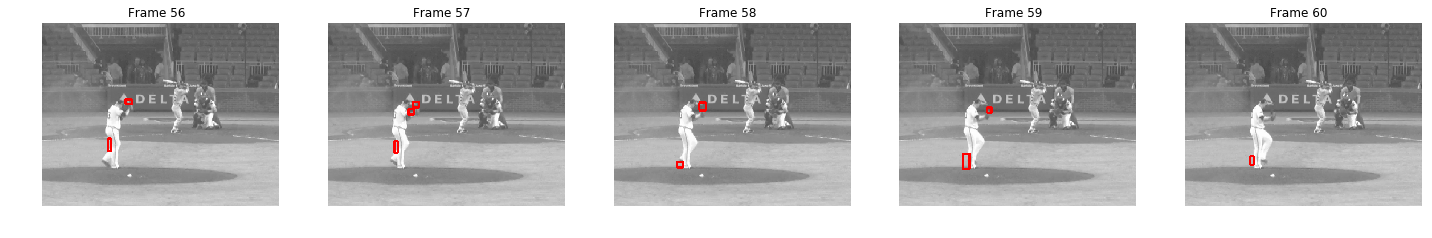

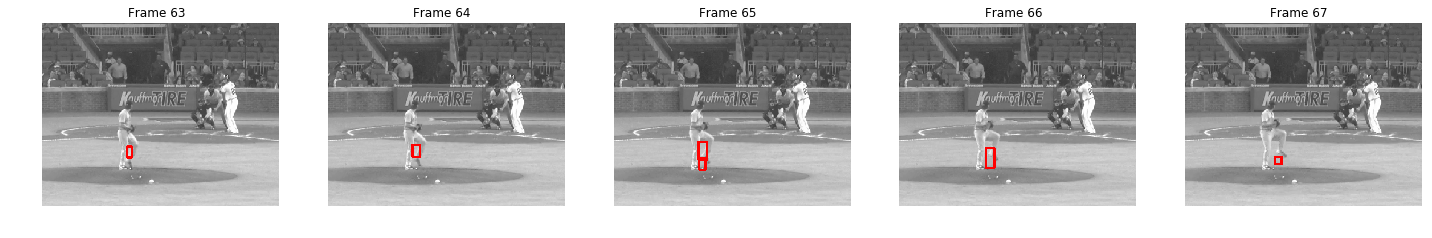

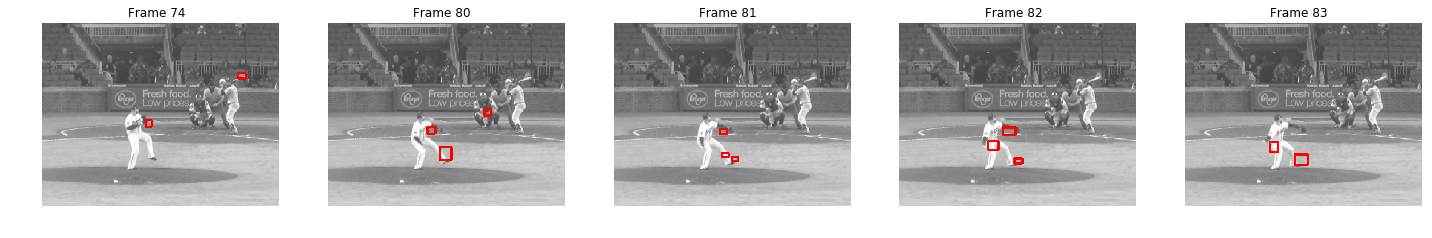

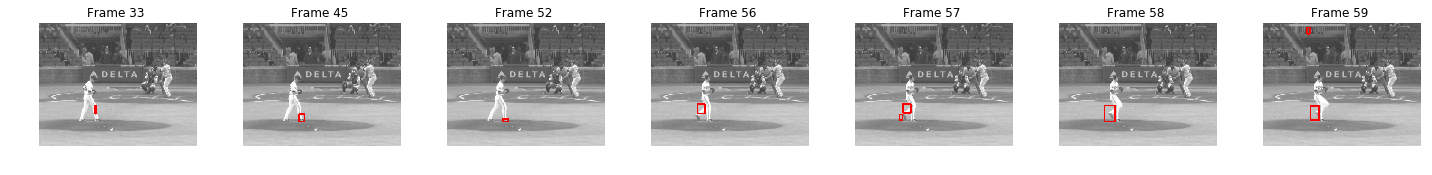

In [61]:
path = "first_move_sequence/"

dic={}

i = sorted(listdir(path))
for l in i:
    if l[:5] in list(dic.keys()):
        dic[l[:5]].append(l)
    else:
        dic[l[:5]]=[l]

for k in dic.keys():
    liste = dic[k]
    fig = plt.figure(figsize = (20, 20))
    gs1 = gridspec.GridSpec(1,len(liste))
    # gs1.update(wspace=0.0, hspace=1.0) # set the spacing between axes. 

    i = 0
    for fi in liste:
        if fi[-4:]==".png":
            ax1 = plt.subplot(gs1[i])
            plt.axis('off')
            ax1.set_aspect('equal')
            img = plt.imread(path+fi)[150:600, 70:650]
            # print(img.shape)#
            plt.imshow(img)
            plt.title("Frame "+fi[-6:-4])
            i+=1
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning)
        # This raises warnings since tight layout cannot
        # handle gridspec automatically. We are going to
        # do that manually so we can filter the warning.
        gs1.tight_layout(fig, h_pad = -2, w_pad =1)
    # fig.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.show()

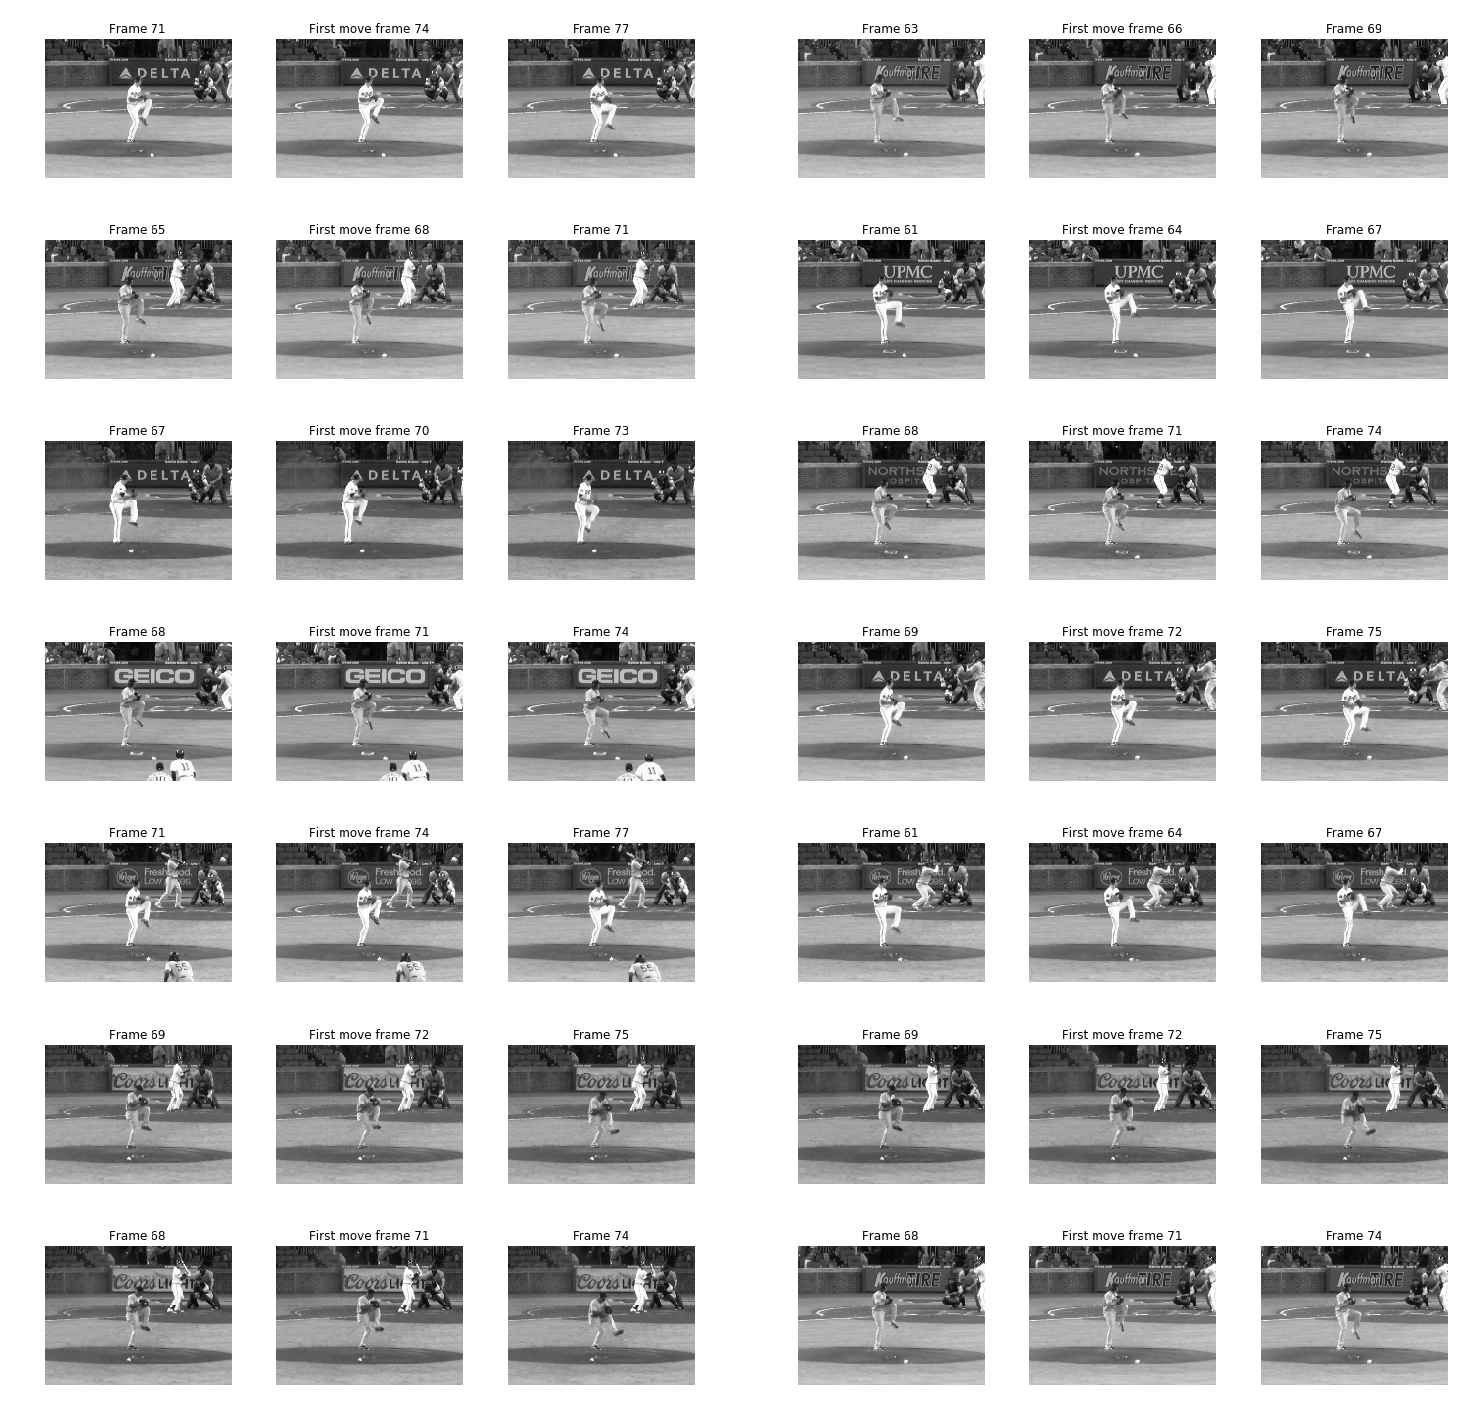

'\npath = "saved_every_third/"\nfig = plt.figure(figsize = (17,18))\ni = 0\nfor fi in (listdir(path)[:15]):\n    if fi[-4:]==".png":\n        fig.add_subplot(7,2,i+1)\n        img = plt.imread(path+fi)[70:260, 25:705]\n        # print(img.shape)#\n        plt.imshow(img)\n        plt.axis("off")\n        i+=1\n# plt.tight_layout()\nplt.show()\n'

In [45]:
import matplotlib.gridspec as gridspec
import warnings

path = "saved_every_third/"
fig = plt.figure(figsize = (20, 20))
gs1 = gridspec.GridSpec(7, 2)
gs1.update(wspace=0.0, hspace=1.0) # set the spacing between axes. 

i = 0
for fi in (listdir(path)[:15]):
    if fi[-4:]==".png":
        ax1 = plt.subplot(gs1[i])
        plt.axis('off')
        # ax1.set_aspect('equal')
        img = plt.imread(path+fi)[80:260, 25:705]
        # print(img.shape)#
        plt.imshow(img)
        i+=1
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    # This raises warnings since tight layout cannot
    # handle gridspec automatically. We are going to
    # do that manually so we can filter the warning.
    gs1.tight_layout(fig, h_pad = -1, w_pad =30)
# fig.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.show()

"""

fig = plt.figure(figsize = (17,18))
i = 0
for fi in (listdir(path)[:15]):
    if fi[-4:]==".png":
        fig.add_subplot(7,2,i+1)
        img = plt.imread(path+fi)[70:260, 25:705]
        # print(img.shape)#
        plt.imshow(img)
        plt.axis("off")
        i+=1
# plt.tight_layout()
plt.show()
"""

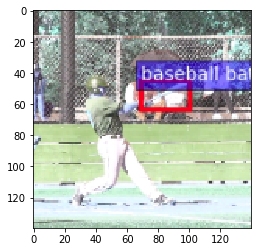

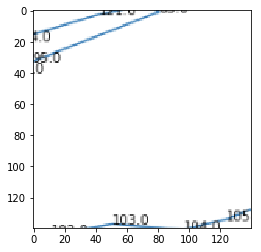

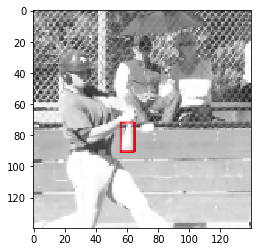

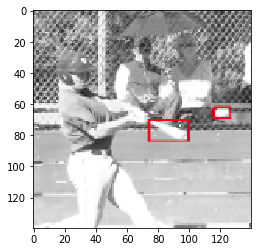

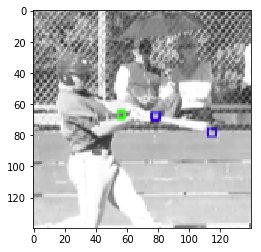

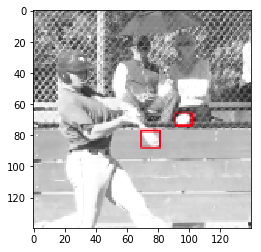

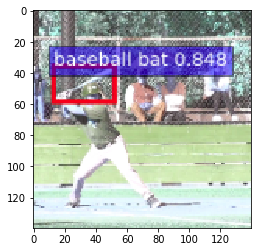

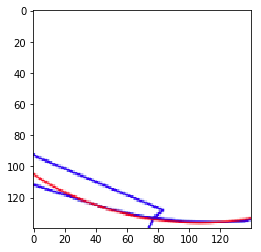

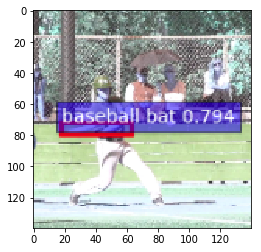

In [21]:
path = "/Users/ninawiedemann/Desktop/BA/bat/"
for fi in listdir(path):
    if fi[0]!="B":
        continue
    img = plt.imread(path+fi)
    x,y,_ = img.shape
    center = np.array((np.array(list(img.shape))/2)[:2]).astype(int)
    img = np.array(img)
    plt.imshow(img[center[0]-70:center[0]+70,center[1]-70:center[1]+70])
    plt.savefig(path+"new"+fi)
    plt.show()

# release

In [ ]:
path = "/Users/ninawiedemann/Desktop/BA/release_frame evaluation/"
fig = plt.figure(figsize = (20,20))
i = 0
for fi in (listdir(path)[:22]):
    if fi[-4:]==".png":
        fig.add_subplot(5,4,i+1)
        img = plt.imread(path+fi)[50:280, 230:520]
        # print(img.shape)#
        plt.imshow(img)
        plt.axis("off")
        i+=1
plt.tight_layout()
plt.show()

# events

In [ ]:
pitcher_events = {"Ball release": release_from_video, "First move": first_move_frame}
batter_events = {"Foot raised": foot_up, "Foot down": foot_down_gradient, "First step": first_move_nn}
col=["green", "blue","red", "purple","orange", "black", "lime", "gray", "yellow"]
co = ["x","y"]

start_p = 50
start_b = 80
end_p = 100
end_b = 140

# PITCHER
limits = [450, 170]
fig = plt.figure(figsize = (20,8))
fig.add_subplot(1,2,1)
for j in [0,1]:
    x = np.arange(start_p, end_p)
    plt.plot(x, pitcher[x,:, j], label = co[j], color = col[j])
for i, event in enumerate(list(pitcher_events.keys())):
    ev = pitcher_events[event]
    plt.plot([ev, ev], limits, color=col[i+2], label=event)
plt.legend(bbox_to_anchor=(0., 0.93, 1., 1.0), loc=3,
           ncol=4, mode="expand", borderaxespad=0.1, fontsize=15)
plt.title("Pitcher - Timeline on trajectories", fontsize=20)
plt.ylim(limits[0], limits[1])
plt.xlim(start_p, end_p)
plt.xticks(fontsize=15)
plt.ylabel("X/Y value", fontsize=20)
plt.xlabel("Frame index", fontsize=20)
# plt.show()

fig.add_subplot(1,2,2)
# BATTER foot_up, foot_down_gradient first_move_gradient first_move_nn
limits = [600, 70]
for j in [0,1]:
    x = np.arange(start_b, end_b)
    plt.plot(x, batter[x,:, j], label = co[j], color = col[j])
for i, event in enumerate(list(batter_events.keys())):
    ev = batter_events[event]
    plt.plot([ev, ev], limits, color=col[i+4], label=event)
plt.legend(bbox_to_anchor=(0., 0.93, 1., 1.0), loc=3,
           ncol=5, mode="expand", borderaxespad=0.1, fontsize=15)
plt.title("Batter - Timeline on trajectories", fontsize = 20)
plt.ylim(limits[0], limits[1])
plt.xlim(start_b, end_b)
plt.xticks(fontsize=15)
plt.ylabel("X/Y value", fontsize=20)
plt.xlabel("Frame index", fontsize=20)
plt.show()

show_frames = [first_move_frame, foot_up, release_from_video, foot_down_gradient, first_move_nn]
player = ["p", "b", "p", "b", "b"]
col_inds = [3,4,2,5,6]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    if player[ind]=="p":
        plt.imshow(eval("videos_"+player[ind])[i])
    else:
        # print(len(videos_b[ind]), len(videos_b[ind][0]))
        a = np.array(eval("videos_"+player[ind])[i])
        plt.imshow(a[30:150, 40:120])
    plt.gray()
    plt.axis("off")
    plt.title("frame "+str(i), fontsize = 20, color = col[col_inds[ind]])
# plt.tight_layout()
plt.show()


 

[ 132.   191.5] [ 564.  241.]
0.0 1.0
0.001 1.0
0.002 1.0
0.003 1.0
0.004 1.0
0.005 1.0
0.006 1.0
0.007 1.0
0.008 1.0
0.009 1.0
0.01 1.0
0.011 1.0
0.012 1.0
0.013 1.0
0.014 1.0
0.015 1.0
0.016 1.0
0.017 1.0
0.018 1.0
0.019 1.0
0.02 1.0
0.021 1.0
0.022 1.0
0.023 1.0
0.024 1.0
0.025 1.0
0.026 1.0
0.027 1.0
0.028 1.0
0.029 1.0
0.03 1.0
0.031 1.0
0.032 1.0
0.033 1.0
0.034 1.0
0.035 1.0
0.036 1.0
0.037 1.0
0.038 1.0
0.039 1.0
0.04 1.0
0.041 1.0
0.042 1.0
0.043 1.0
0.044 1.0
0.045 1.0
0.046 1.0
0.047 1.0
0.048 1.0
0.049 1.0
0.05 1.0
0.051 1.0
0.052 1.0
0.053 1.0
0.054 1.0
0.055 1.0
0.056 1.0
0.057 1.0
0.058 1.0
0.059 1.0
0.06 1.0
0.061 1.0
0.062 1.0
0.063 1.0
0.064 1.0
0.065 1.0
0.066 1.0
0.067 1.0
0.068 1.0
0.069 1.0
0.07 1.0
0.071 1.0
0.072 1.0
0.073 1.0
0.074 1.0
0.075 1.0
0.076 1.0
0.077 1.0
0.078 1.0
0.079 1.0
0.08 1.0
0.081 1.0
0.082 1.0
0.083 1.0
0.084 1.0
0.085 1.0
0.086 1.0
0.087 1.0
0.088 1.0
0.089 1.0
0.09 1.0
0.091 1.0
0.092 1.0
0.093 1.0
0.094 1.0
0.095 1.0
0.096 1.0
0.097 1

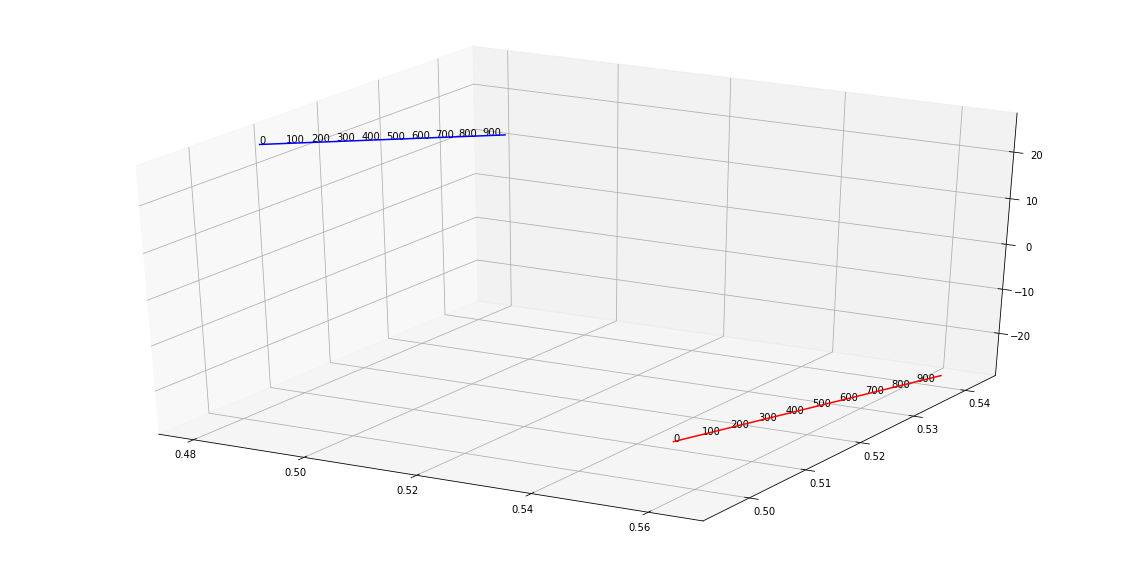

KeyboardInterrupt: 

In [15]:
dic_b = {
  "viewport": [
    0,
    0,
    720,
    508
  ],
  "optical_center": [
    144.8727889587459,
    -90.58828866257572,
    49.459882510736506
  ],
  "optical_axis": [
    -0.7604516078378313,
    0.611446927929609,
    -0.21873730011660333
  ],
  "up_vector": [
    -0.19396938320105456,
    0.10758941758701573,
    0.9750899423150098
  ],
  "field_of_view": 10.897956785790576,
  "near_clipping_plane": 1,
  "far_clipping_plane": 1000,
  "aspect_ratio": 1.4173228346456692,
    "inverse_matrix": [[0.083789490432439162, 0.10598746948994554, 0.0049733545124303327, -5.7215485905121432e-018],
    [-0.018502740420923085, 0.010262935102426183, 0.093014215998134545, 0],
    [-72.363963622827754, 45.248854062927798, -24.705211792011156, -0.49949999999999800],
    [71.748384792345973 , -44.727995465541284, 24.535934356966450, 0.50049999999999695]]
}
    
    
    # [[0.0837895, 0.105987, 0.00497335, 1.73646e-018], [-0.0185027, 0.0102629, 0.0930142, -2.77833e-017],[-72.364, 45.2489, -24.7052, -0.4995],[71.7484, -44.728, 24.5359, 0.5005]]


dic_a = {
  "viewport": [
    0,
    0,
    720,
    508
  ],
  "optical_center": [
    -189.9353890290214,
    -116.74239537869931,
    61.262866861075636
  ],
  "optical_axis": [
    0.7730534721909763,
    0.5913573559351585,
    -0.22953171178478543
  ],
  "up_vector": [
    0.14468665043055734,
    0.18792271312443662,
    0.9714683870714149
  ],
  "field_of_view": 8.732581560716557,
  "near_clipping_plane": 1,
  "far_clipping_plane": 1000,
  "aspect_ratio": 1.4173228346456692,
  "inverse_matrix": 
    [[0.0668376911751491, -0.0848655574580515, 0.00646201588567929, -3.66579545615059e-018],
    [0.0110475719885407, 0.0143487799588275, 0.0741754606802753, -9.16448864037646e-019],
    [94.8727268199953, 58.3128264916598, -30.600801997107, -0.499499999999995],
    [-94.2896087368334, -57.8382115311033, 30.4325331521833, 0.500499999999996]]
}
    
# [[0.0668377, -0.0848656, 0.00646202, -1.73646e-018], [0.0110476, 0.0143488, 0.0741755, 5.55667e-017],[94.8727, 58.3128, -30.6008, -0.4995],  [-94.2896, -57.8382, 30.4325, 0.5005]]

a_bases = [[70,230], [670,400]]
b_bases = [[690,290], [50,400]]
# camera_b_trajectory = np.asarray([[580.5, 236.5, 11.0], [544.0, 244.5, 12.0], [506.0, 253.0, 13.0], [468.0, 261.5, 14.0], [430.0, 272.5, 15.0], [392.0, 284.0, 16.0], [353.0, 294.0, 17.0], [233.0, 333.0, 20.0], [192.0, 347.5, 21.0], [152.0, 361.0, 22.0], [108.0, 376.5, 23.0], [64.5, 393.0, 24.0]])

camera_b_trajectory = np.asarray([[564.0, 241.0, 11.0], [522.0, 252.0, 12.0], [480.0, 261.5, 13.0], [435.5, 272.5, 14.0], [392.0, 284.0, 15.0], [348.0, 296.0, 16.0], [301.0, 308.0, 17.0], [255.0, 321.0, 18.0], [208.0, 332.5, 19.0], [158.5, 346.5, 20.0], [108.0, 361.5, 21.0], [59.0, 374.5, 22.0]])

# camera_a_trajectory = np.asarray([[156.0, 196.5, 11.0], [194.5, 207.5, 12.0], [234.0, 221.0, 13.0], [276.0, 233.0, 14.0], [315.5, 245.0, 15.0], [356.0, 260.0, 16.0], [396.0, 273.5, 17.0], [437.0, 287.5, 18.0], [480.5, 304.0, 19.0], [524.0, 320.5, 20.0], [566.0, 336.5, 21.0], [611.5, 355.0, 22.0]])

camera_a_trajectory = np.asarray([[132.0, 191.5, 11.0], [177.5, 204.5, 12.0], [221.0, 217.0, 13.0], [268.0, 231.5, 14.0], [313.5, 244.5, 15.0], [360.0, 261.0, 16.0], [406.5, 276.0, 17.0], [453.5, 291.0, 18.0], [501.5, 308.0, 19.0], [552.0, 323.5, 20.0]])#, [601.5, 340.5, 21.0]]) # first frame: 

#plt.plot(camera_a_trajectory[:,0], camera_a_trajectory[:,1])
#plt.show()
#plt.plot(camera_b_trajectory[:,0], camera_b_trajectory[:,1])
#plt.show()

#camera_a_trajectory_1 = []
#camera_b_trajectory_1 = []
trajectory_3D = []
trajectory_3D_2 = []
for point1, point2 in zip(camera_a_trajectory[:, :2], camera_b_trajectory[:, :2]):
    print("\n \n")
    print(point1, point2)
    for p, dic in zip(["point1", "point2"], ["dic_a", "dic_b"]):
        point = eval(p)
        out_2 = []
        width = eval(dic)["viewport"][2]
        height = eval(dic)["viewport"][3]
        for d in np.arange(0,1,0.001): #-15,15,0.05):
            norm1 = np.asarray([point[0]/width, (height-point[1])/height, d, 1]) #*2 -1
            out_2.append(np.dot(eval(dic)["inverse_matrix"], norm1))
        #print(out_1.shape, out_2.shape)
        out_2 = np.asarray(out_2)
        print(np.min(out_2[:3]), np.max(out_2[:3]))
        out_2 = (out_2+1)/2
        # out_2[:3]/=out_2[3]
        out_2 = out_2[:, :3]
        if p=="point1":
            out_1 = out_2.copy()
    
    print(out_1.shape, out_2.shape)

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(out_1[:,0], out_1[:,1], out_1[:,2], c="blue") #, linewidth=3)
    for i in range(len(out_1)):
        if i%100==0:# and out_1[i,0]>-0.002 and out_1[i,0]<0.004 and out_1[i,1]>-0.01 and out_1[i,1]<0.002:
            ax.text(out_1[i,0],out_1[i,1],out_1[i,2],  '%s' % (str(i)), size=10, zorder=1)
    ax.plot(out_2[:,0], out_2[:,1], out_2[:,2], c="red") #, linewidth=3)
    for i in range(len(out_2)):
        if i%100==0:# and out_2[i,0]>-0.002 and out_2[i,0]<0.004 and out_2[i,1]>-0.01 and out_2[i,1]<0.002:
            ax.text(out_2[i,0],out_2[i,1],out_2[i,2],  '%s' % (str(i)), size=10, zorder=1)
    plt.show()
    

    mini = np.inf
    for k, a in enumerate(out_1):
        # print("\n new a ")
        for l, b in enumerate(out_2):
            # print(np.asarray(a)[:2], np.asarray(b)[:2])
            dist = np.linalg.norm(np.asarray(a)[:2]-np.asarray(b)[:2])
            # print(a,b, dist)
            if dist<mini:
                mini = dist
                point = np.mean(np.asarray([a,b]), axis = 0)
                a_best = k #np.asarray(a).copy()
                b_best = l #np.asarray(b).copy()
                # print("new minimum", point, dist)
    print("blue line best", a_best,"red line best", b_best) #, np.linalg.norm(np.asarray(a_best)-np.asarray(b_best)))
    trajectory_3D.append(out_2[b_best])
    trajectory_3D_2.append(out_1[a_best])
    
    #camera_a_trajectory_1.append(norm1)
    #camera_b_trajectory_1.append(norm2)

trajectory_3D = np.asarray(trajectory_3D)
trajectory_3D_2 = np.asarray(trajectory_3D_2)
print(trajectory_3D)

for i in range(len(trajectory_3D)-1):
    dist = np.linalg.norm(trajectory_3D[i]-trajectory_3D[i+1])
    print(dist)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trajectory_3D[:,0], trajectory_3D[:,1], trajectory_3D[:,2]) #, linewidth=3)
for i in range(len(trajectory_3D)):
    ax.text(trajectory_3D[i,0],trajectory_3D[i,1],trajectory_3D[i,2],  '%s' % (str(i)), size=20, zorder=1)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trajectory_3D_2[:,0], trajectory_3D_2[:,1], trajectory_3D_2[:,2]) #, linewidth=3)
for i in range(len(trajectory_3D_2)):
    ax.text(trajectory_3D_2[i,0],trajectory_3D_2[i,1],trajectory_3D_2[i,2],  '%s' % (str(i)), size=20, zorder=1)
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(trajectory_3D[:,0], trajectory_3D[:,1])
for i in range(len(trajectory_3D)):
    plt.annotate(str(i), xy = (trajectory_3D[i,0], trajectory_3D[i,1]))
# plt.xlim(-0.0025, 0.0025)
plt.show()

mean_distance_camera_a = np.mean([np.linalg.norm(trajectory_3D_2[i]-trajectory_3D_2[i+1]) for i in range(len(trajectory_3D_2)-1)])
mean_distance_camera_b = np.mean([np.linalg.norm(trajectory_3D[i]-trajectory_3D[i+1]) for i in range(len(trajectory_3D)-1)])

print("mean distances per frame", mean_distance_camera_a, mean_distance_camera_b)
#camera_a_trajectory = np.asarray(camera_a_trajectory_1)
#camera_b_trajectory = np.asarray(camera_b_trajectory_1)

#plt.plot(camera_b_trajectory[:,0], camera_b_trajectory[:,1])
#plt.show()
# camera_b frame 12-23: (entweder synchron oder camera b setzt bisschen späer ein als a)


In [108]:
import tensorflow as tf

In [188]:
def confusion_matrix(out,labels):
    uni = np.unique(out) if len(np.unique(out))> len(np.unique(labels)) else np.unique(labels)
    data = []
    for i in uni:
        inds = np.where(labels==i)[0]
        outs_type = out[inds]
        # print(i, [np.sum(outs_type==j) for j in uni]) 
        data.append([np.sum(outs_type==j) for j in uni])
    row_format ="{:>15}" * (len(uni) + 1)
    print(row_format.format("", *uni))
    for lab, row in zip(uni, data):
        print(row_format.format(lab, *row))
    print(np.asarray(data))
    
    plt.figure(figsize=(20,10))
    plt.imshow(np.asarray(data))
    plt.xticks(np.arange(0,len(uni),1), uni)
    plt.yticks(np.arange(0,len(uni),1), uni)
    plt.colorbar()
    #plt.ylabels(uni)
    plt.show()

                           bin          hallo           hier            ich
            bin              0              0              0              0
          hallo              0              1              0              0
           hier              0              0              1              0
            ich              1              0              0              1
[[0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 1]]


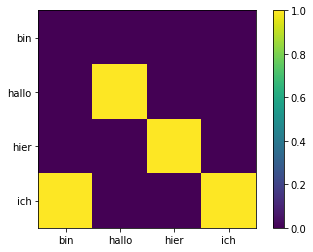

In [189]:
confusion_matrix(np.asarray(["hallo", "hier", "bin", "ich"]), np.asarray(["hallo", "hier", "ich", "ich"]))

FILE, [80].npy
FILE, [28].npy
FILE, [98].npy
FILE, [57].npy
FILE, [71].npy


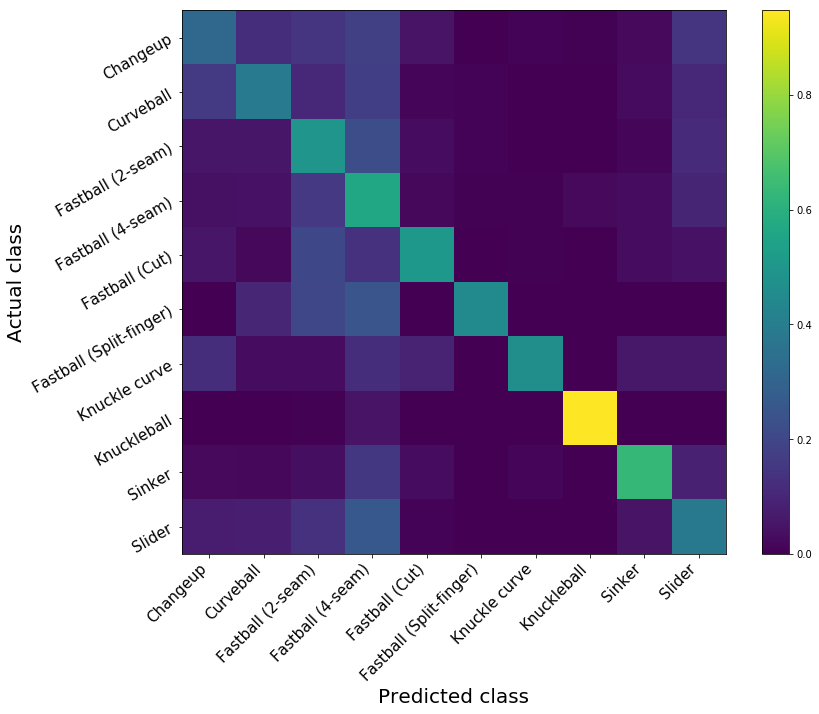

In [80]:
path = "/Volumes/Nina Backup/confuse_matrices/"
uni = ["Changeup", "Curveball", "Fastball (2-seam)", "Fastball (4-seam)", "Fastball (Cut)", "Fastball (Split-finger)", "Knuckle curve", "Knuckleball", "Sinker", "Slider"]
av_data = []
for fi in listdir(path):
    if fi=="rnn_matrix.npy":
        continue
    data = np.load(path+fi)
    av_data.append(data)
    print("FILE,", fi)

data = np.sum(np.asarray(av_data), axis=0)
data = [data[i]/np.sum(data, axis=1)[i] for i in range(len(data))]

# print(np.sum(data, axis=1))
plt.figure(figsize=(13,10))
plt.imshow(np.asarray(data))
plt.xticks(np.arange(0,len(uni),1), uni, rotation=45, ha='right', fontsize = 15)
plt.yticks(np.arange(0,len(uni),1), uni, rotation=30, fontsize = 15)
plt.xlabel("Predicted class", fontsize = 20)
plt.ylabel("Actual class", fontsize = 20)
plt.colorbar()
plt.show()

In [ ]:
pitcher = 

import math
limbSeq = [[0,1], [1,2], [0,3], [3,4], [4,5], [6,9],[6,7], [7,8],[9,10],[10,11], [0,6], [3,9]]
stickwidth = 2
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

cap = cv2.VideoCapture(example+".mp4")
_, canvas = cap.read()
plt.figure(figsize =(20,10))
for j in range(len(pitcher_array)):
    if j%20==0:
        for player in ["pitcher"]:
            for i, inds in enumerate(limbSeq):
                if inds[0]>11 or inds[1]>11:
                    continue
                Y = eval(player)[j,inds, 0]
                X = eval(player)[j,inds, 1]
                mX = np.mean(X)
                mY = np.mean(Y)
                cur_canvas = canvas.copy()
                length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
                angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
                polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
                cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
                canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)

plt.imshow(canvas)
plt.show()

In [4]:
def from_json(file):
    coordinates = ["x", "y"]
    joints_list = ["right_shoulder", "right_elbow", "right_wrist", "left_shoulder","left_elbow", "left_wrist",
            "right_hip", "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle",
            "right_eye", "right_ear","left_eye", "left_ear", "nose ", "neck"]
    with open(file, 'r') as inf:
        out = json.load(inf)

    liste = []
    for fr in out["frames"]:
        l_joints = []
        for j in joints_list[:12]:
            l_coo = []
            for xy in coordinates:
                l_coo.append(fr[j][xy])
            l_joints.append(l_coo)
        liste.append(l_joints)

    return np.array(liste)

import math
import json

(1080, 1920, 3)


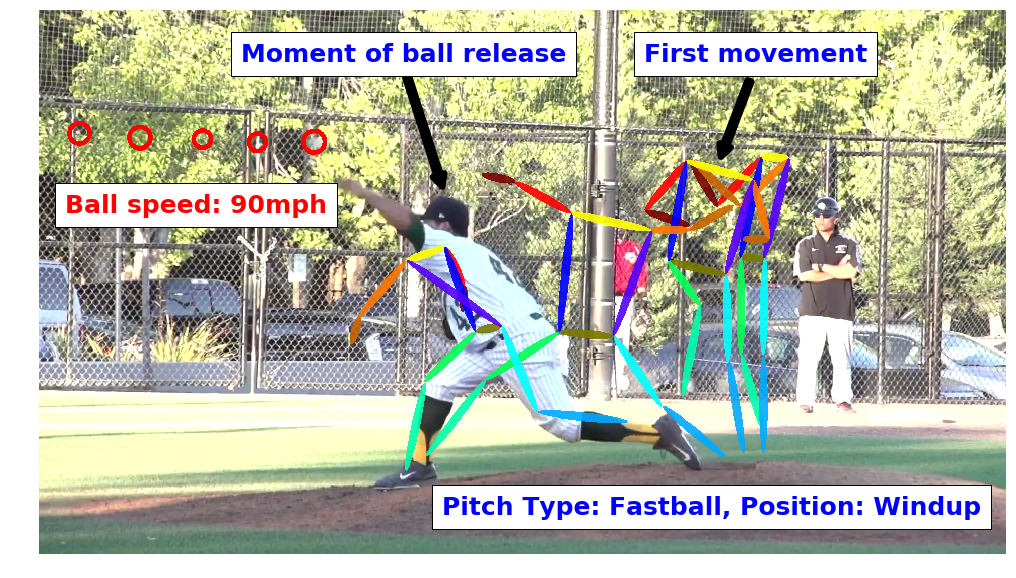

In [87]:

limbSeq = [[0,1], [1,2], [0,3], [3,4], [4,5], [6,9],[6,7], [7,8],[9,10],[10,11], [0,6], [3,9]]
stickwidth = 8
colors = [[255, 0, 0], [120, 0, 0], [255, 255, 0], [255, 120, 0], [200, 100, 0], [120, 120, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cap = cv2.VideoCapture("/Volumes/Nina Backup/high_quality_testing/pitcher/#42 LHP Michael Chavez.mp4") #26 RHP Tim Willites (2).mp4") #example+".mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 470)
_, canvas = cap.read()
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
print(canvas.shape)
pitcher = from_json("/Volumes/Nina Backup/low_quality_testing/scale0tests/#42 LHP Michael Chavez.json")
plt.figure(figsize =(20,10))
ball_trajectory = [[479, (525, 241), (568, 282)], [480, (416, 245), (451, 280)], [481, (304, 241), (344, 272)], 
                   [482, (176, 235), (224, 272)], [483, (56, 229), (104, 262)]]
frame_list = [0, 400, 450, 490]
for j in range(len(pitcher)):
    if j >=ball_trajectory[0][0] and j<=ball_trajectory[-1][0]:
        cand = ball_trajectory[j-ball_trajectory[0][0]]
        center = (int((cand[1][0]+cand[2][0])/2), int((cand[1][1]+cand[2][1])/2))
        radius = sum(np.absolute(np.array(cand[1])-np.array(cand[2])))/4
        cv2.circle(canvas, center, int(radius),[255,0,0], thickness = 8)
    if j in frame_list:
        for player in ["pitcher"]:
            for i, inds in enumerate(limbSeq):
                if inds[0]>11 or inds[1]>11:
                    continue
                Y = eval(player)[j,inds, 0]
                X = eval(player)[j,inds, 1]
                mX = np.mean(X)
                mY = np.mean(Y)
                cur_canvas = canvas.copy()
                length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
                angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
                polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
                cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
                canvas = cv2.addWeighted(canvas, 0.1, cur_canvas, 0.9, 0)
plt.imshow(canvas)
plt.axis("off")
plt.text(50,400, 'Ball speed: 90mph', fontsize=25, color="red", fontweight='bold', bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.text(800,1000, 'Pitch Type: Fastball, Position: Windup', fontsize=25, fontweight='bold', color="blue", bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.annotate('Moment of ball release', xy=(800, 350), xytext=(400,100), color="blue",fontweight='bold',arrowprops=dict(facecolor='black', lw=6.5), fontsize=25, bbox={'facecolor':'white', 'alpha':1, 'pad':10,})
plt.annotate('First movement', xy=(1350, 300), xytext=(1200,100), color="blue",fontweight='bold',arrowprops=dict(facecolor='black', lw=6.5, shrink=0.05), fontsize=25,  bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.savefig("pitcher_reconstruction.png", bbox_inches='tight')
plt.show()

(1080, 1920, 3)
(1080, 1920, 3)


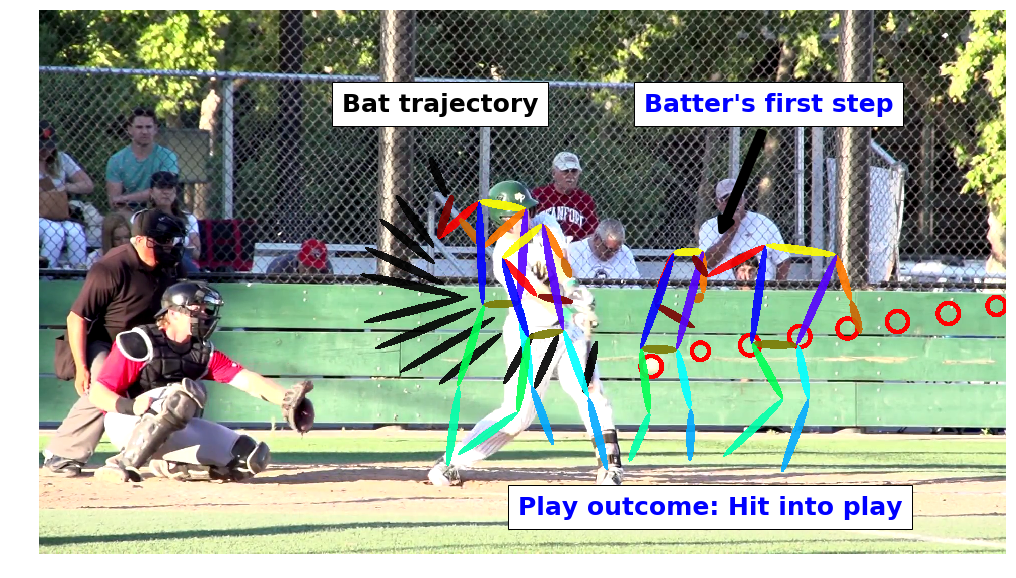

In [86]:
limbSeq = [[0,1], [1,2], [0,3], [3,4], [4,5], [6,9],[6,7], [7,8],[9,10],[10,11], [0,6], [3,9]]
stickwidth = 8
colors = [[255, 0, 0], [120, 0, 0], [255, 255, 0], [255, 120, 0], [200, 100, 0], [120, 120, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cap = cv2.VideoCapture("/Volumes/Nina Backup/high_quality_testing/batter/#33 Logan Trowbridge.mp4") #26 RHP Tim Willites (2).mp4") #example+".mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 251)
_, canvas = cap.read()
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
print(canvas.shape)
# canvas = np.full((len(canvas),len(canvas[0]), 3), 1.)
print(canvas.shape)
pitcher = from_json("logan_towbridge.json")
plt.figure(figsize =(20,10))
ball_trajectory = [[10, (776, 292), (808, 370)], [11, (676, 416), (787, 503)], [12, (708, 368), (785, 471)], 
                  [15, (648, 472), (805, 544)], [23, (637, 526), (838, 566)],
                   # begin turn
                   [20, (645, 570), (852, 618)], 
                   [18, (666, 593), (869, 672)],
                    
                  [25, (793, 642), (920, 742)], [26, (1081, 657), (1107, 760)], [22, (923, 641), (982, 742)],
                   [27, (716, 610), (906, 718)], 
                   [30, (983, 642), (1032, 752)],
                  [28, (1036, 664), (1059, 736)], 
                  [31, (1154, 654), (1216, 732)],  [33, (1142, 617), (1273, 736)], 
                   [35, (1210, 645), (1315, 728)], 
                  [37, (1173, 599), (1356, 712)],  [39, (1188, 585), (1386, 696)],
                   [41, (1198, 571), (1419, 670)],
                  [43, (1219, 558), (1441, 656)], [44, (1206, 527), (1460, 637)], [45, (1225, 509), (1488, 569)],
                  [46, (1225, 521), (1482, 594)], [47, (1162, 462), (1488, 543)], [48, (1230, 533), (1472, 616)],
                  [49, (1229, 483), (1486, 520)], [50,(1241, 469), (1482, 496)], [51, (1211, 434), (1460, 449)],
                  [52, (1189, 402), (1444, 428)], [53, (1161, 368), (1398, 382)], [54,(1098, 257), (1254, 386)]]

balls = [[13, (1680, 600), (1729, 636)], [14, (1780, 584), (1830, 620)], [16, (1582, 616), (1629, 649)], [17, (1882, 570), (1920, 604)],
        [19, (1292, 664), (1335, 690)], [21, (1388, 648), (1434, 683)], [24, (1484, 632), (1536, 664)], [25, (1190,690), (1240,725)]]
       # [34, (1477, 654), (1526, 682)], [36, (1574, 646), (1620, 670)],[38, (1670, 623), (1719, 656)], 
        # [42, (1865, 597), (1914, 632)], [40, (1768, 610), (1817, 644)], [32, (1384, 670), (1428, 692)],[29, (1288, 688), (1328, 707)]]
X = []
Y=[]
for b in balls:
    cand = b
    # cv2.rectangle(canvas, cand[1], cand[2],[255,0,0], 4)
    
    center = (int((cand[1][0]+cand[2][0])/2), int((cand[1][1]+cand[2][1])/2))
    radius = sum(np.absolute(np.array(cand[1])-np.array(cand[2])))/4
    cv2.circle(canvas, center, int(radius),[255,0,0], thickness = 8)
    x,y = b[1]
    x2, y2 = b[2]
    X.append((x+x2)/float(2))
    Y.append((y+y2)/float(2))
#plt.plot(X, Y, c="blue")

frame_list = [0, 259, 355, 400]

X_bat = []
Y_bat=[]
for i,cand in enumerate(ball_trajectory):
    if i<5 or (i>12 and i<25):
        Y = [list(cand[1])[0], list(cand[2])[0]]
        X = [list(cand[1])[1], list(cand[2])[1]]
    else:
        Y = [list(cand[1])[0], list(cand[2])[0]]
        X = [list(cand[2])[1], list(cand[1])[1]]
    Y_bat.append(X)
    X_bat.append(Y)
    if i<12: # or i%3 ==0:
        mX = np.mean(X)
        mY = np.mean(Y)
        cur_canvas = canvas.copy()
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv2.fillConvexPoly(cur_canvas, polygon, [0,0,0])
        canvas = cv2.addWeighted(canvas, 0.1, cur_canvas, 0.9, 0)
    
    # cv2.rectangle(canvas, cand[1], cand[2],[255,0,0], 4)
# plt.plot(X_bat, Y_bat, c="black")

for j in frame_list:
    for player in ["pitcher"]:
        for i, inds in enumerate(limbSeq):
            if inds[0]>11 or inds[1]>11:
                continue
            Y = eval(player)[j,inds, 0]
            X = eval(player)[j,inds, 1]
            mX = np.mean(X)
            mY = np.mean(Y)
            cur_canvas = canvas.copy()
            length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
            angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
            polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
            cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
            canvas = cv2.addWeighted(canvas, 0.1, cur_canvas, 0.9, 0)
plt.imshow(canvas)
plt.axis("off")
plt.text(600,200, 'Bat trajectory', fontsize=25, color="black",fontweight='bold', bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.text(950,1000, 'Play outcome: Hit into play', fontsize=25, color="blue", fontweight='bold',bbox={'facecolor':'white', 'alpha':1, 'pad':10})
# plt.annotate("Batter's first step", xy=(1280, 450), xytext=(1300,200), color="blue",fontweight='bold',arrowprops=dict(facecolor='black', lw=6.5,shrink=0.2), fontsize=25,  bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.annotate("Batter's first step", xy=(1350, 450), xytext=(1200,200), color="blue",fontweight='bold',arrowprops=dict(facecolor='black', lw=6.5, shrink=0.05), fontsize=25,  bbox={'facecolor':'white', 'alpha':1, 'pad':10})
plt.savefig("batter_reconstruction.png", bbox_inches='tight')
plt.show()

In [92]:
cf = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/train_data/cf_batter.csv")

In [93]:
not_nan = cf["Batter"].values
inds = np.logical_not(np.isnan(not_nan))
print(inds)
not_nan = not_nan[inds]
print(len(np.unique(not_nan)))

[ True  True  True ...,  True  True  True]
280


In [94]:
not_nan = cf["Batter"].values
inds = np.isnan(not_nan)
print(inds)
not_nan = not_nan[inds]
print(len(np.unique(not_nan)))

[False False False ..., False False False]
102
